La regresión logística es un modelo estadístico utilizado para predecir el resultado de una variable dependiente categórica basada en una o más variables independientes. Aunque su nombre sugiere una relación con la regresión lineal, la regresión logística se utiliza principalmente para tareas de clasificación binaria (sí/no, verdadero/falso, éxito/fracaso) y no para predecir valores continuos.

### Fundamentos de la Regresión Logística

1. *Modelo de Clasificación*: La regresión logística estima la probabilidad de que una observación pertenezca a una de las dos clases posibles. La salida del modelo es una probabilidad que luego se convierte en una predicción de clase mediante un umbral (generalmente 0.5).

2. *Función Sigmoide*: El modelo de regresión logística utiliza una función sigmoide (o logística) para mapear cualquier valor real a un valor entre 0 y 1, que puede interpretarse como una probabilidad. La función sigmoide se define como:
   \[
   \sigma(z) = \frac{1}{1 + e^{-z}}
   \]
   donde \(z\) es una combinación lineal de los valores de entrada (características) ponderados por los coeficientes del modelo.

3. *Función de Costo*: En lugar de minimizar el error cuadrático medio como en la regresión lineal, la regresión logística utiliza una función de costo llamada "log-loss" o "entropía cruzada" para medir el error del modelo. Esta función es adecuada para problemas de clasificación y penaliza fuertemente las predicciones incorrectas con alta confianza.

### Proceso de la Regresión Logística

1. *Cálculo de la Combinación Lineal*: 
   \[
   z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
   \]
   donde \(\beta_0\) es el término de intercepción (bias) y \(\beta_i\) son los coeficientes asociados a cada característica \(x_i\).

2. *Aplicación de la Función Sigmoide*:
 
   \(\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}\)
   La salida \(\hat{y}\) es la probabilidad de que la observación pertenezca a la clase positiva (por ejemplo, 1).

3. *Predicción de Clase*: 
   \[
   \text{Clase Predicha} = 
   \begin{cases} 
   1 & \text{si } \hat{y} \geq 0.5 \\
   0 & \text{si } \hat{y} < 0.5 
   \end{cases}
   \]
   El umbral de 0.5 es el más común, pero puede ajustarse según el problema y las necesidades específicas.

### Ejemplo Intuitivo

Supongamos que estamos tratando de predecir si un estudiante pasará o no un examen basado en el número de horas que ha estudiado y si asistió a una clase preparatoria. Las características serían:

- \(x_1\): Número de horas de estudio
- \(x_2\): Asistencia a clase preparatoria (0 para no, 1 para sí)

La combinación lineal podría ser:
\[
z = \beta_0 + \beta_1 \cdot (\text{horas de estudio}) + \beta_2 \cdot (\text{asistencia})
\]

Aplicamos la función sigmoide para obtener una probabilidad:
\[
\hat{y} = \frac{1}{1 + e^{-z}}
\]

Si \(\hat{y} \geq 0.5\), predecimos que el estudiante pasará el examen; de lo contrario, predecimos que no lo pasará.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

clientes=pd.read_csv('C:/Users/jhinn/OneDrive/Desktop/especializacion/Curso Machine learning/Librerio scikit-learn/Regresión logistica/creditos.csv')

In [2]:
clientes

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
695,33,536523,1
696,22,545572,1
697,21,319903,1
698,28,125605,1


In [3]:
buenos=clientes[clientes['cumplio']==1]
malos=clientes[clientes['cumplio']==0]
buenos





,edad,credito,cumplio
1,19,477965,1
6,23,583565,1
7,24,100000,1
8,24,199272,1
13,25,195341,1
...,...,...,...
695,33,536523,1
696,22,545572,1
697,21,319903,1
698,28,125605,1


In [4]:
malos

,edad,credito,cumplio
0,18,363112,0
2,20,239072,0
3,22,195265,0
4,22,482174,0
5,23,468815,0
...,...,...,...
519,35,473909,0
523,25,308409,0
524,65,211316,0
526,31,496819,0


In [5]:
clientes['cumplio'].value_counts(normalize=True)*100

cumplio
1    72.571429
0    27.428571
Name: proportion, dtype: float64

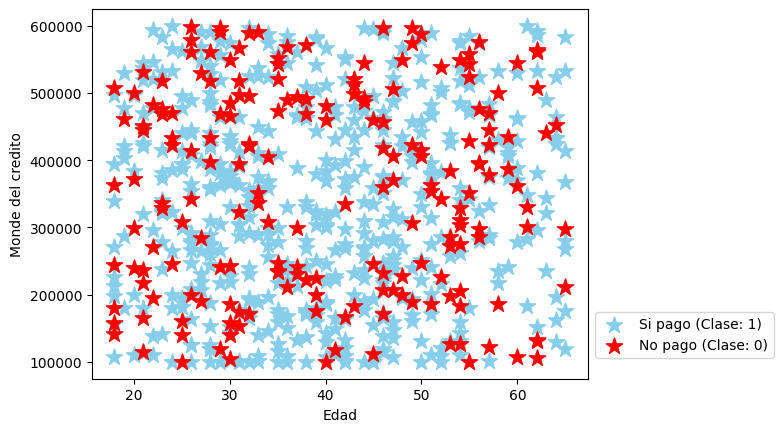

In [6]:
plt.scatter(buenos['edad'],buenos['credito'],marker='*',s=150,color='skyblue',label='Si pago (Clase: 1)')
plt.scatter(malos['edad'],malos['credito'],marker='*',s=150,color='red',label='No pago (Clase: 0)')

plt.ylabel('Monde del credito')
plt.xlabel('Edad')
plt.legend(bbox_to_anchor=(1,0.2))
plt.show()

In [7]:
X= clientes[['edad','credito']].to_numpy()#clientes.loc[:,['edad','credito']]  
Y=clientes['cumplio'].to_numpy()
Y

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [8]:
X

array([[    18, 363112],
       [    19, 477965],
       [    20, 239072],
       ...,
       [    21, 319903],
       [    28, 125605],
       [    25, 440965]], dtype=int64)

In [9]:
Y

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [10]:
from sklearn.model_selection import train_test_split


x_tr, x_ts, y_tr, y_ts = train_test_split(X, Y,
                                                test_size=0.3,
                                                random_state=23)
print(x_tr.shape, y_tr.shape)
print(x_ts.shape, y_ts.shape)

(490, 2) (490,)
(210, 2) (210,)


In [11]:
escalador=preprocessing.StandardScaler()

x_tr_s=escalador.fit_transform(x_tr)


In [12]:
x_ts_s=escalador.transform(x_ts)

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp_clf=MLPClassifier(hidden_layer_sizes=(100,200,10),
                      activation='relu',
                      solver='adam',
                      max_iter=1000,
                      random_state=42,verbose=True)

In [14]:
mlp_clf.fit(x_tr_s,y_tr)

Iteration 1, loss = 0.67684308
Iteration 2, loss = 0.63134207
Iteration 3, loss = 0.60973298
Iteration 4, loss = 0.59765525
Iteration 5, loss = 0.59288031
Iteration 6, loss = 0.59493914
Iteration 7, loss = 0.59494731
Iteration 8, loss = 0.59287231
Iteration 9, loss = 0.59064171
Iteration 10, loss = 0.58741075
Iteration 11, loss = 0.58645993
Iteration 12, loss = 0.58506859
Iteration 13, loss = 0.58452612
Iteration 14, loss = 0.58347970
Iteration 15, loss = 0.58233792
Iteration 16, loss = 0.58111165
Iteration 17, loss = 0.57992398
Iteration 18, loss = 0.57872071
Iteration 19, loss = 0.57749637
Iteration 20, loss = 0.57667492
Iteration 21, loss = 0.57562511
Iteration 22, loss = 0.57476362
Iteration 23, loss = 0.57390393
Iteration 24, loss = 0.57312820
Iteration 25, loss = 0.57188445
Iteration 26, loss = 0.57132241
Iteration 27, loss = 0.57031634
Iteration 28, loss = 0.56977502
Iteration 29, loss = 0.56965185
Iteration 30, loss = 0.56815480


Iteration 31, loss = 0.56701137
Iteration 32, loss = 0.56663537
Iteration 33, loss = 0.56627940
Iteration 34, loss = 0.56570085
Iteration 35, loss = 0.56480099
Iteration 36, loss = 0.56432598
Iteration 37, loss = 0.56353620
Iteration 38, loss = 0.56308322
Iteration 39, loss = 0.56268102
Iteration 40, loss = 0.56223070
Iteration 41, loss = 0.56175389
Iteration 42, loss = 0.56159601
Iteration 43, loss = 0.56157545
Iteration 44, loss = 0.56091938
Iteration 45, loss = 0.56082623
Iteration 46, loss = 0.56056379
Iteration 47, loss = 0.56046429
Iteration 48, loss = 0.56034723
Iteration 49, loss = 0.56013372
Iteration 50, loss = 0.56013341
Iteration 51, loss = 0.55926179
Iteration 52, loss = 0.55900711
Iteration 53, loss = 0.55876427
Iteration 54, loss = 0.55917431
Iteration 55, loss = 0.55862783
Iteration 56, loss = 0.55825487
Iteration 57, loss = 0.55828171
Iteration 58, loss = 0.55758675
Iteration 59, loss = 0.55774080
Iteration 60, loss = 0.55749478
Iteration 61, loss = 0.55716073
Iteratio

MLPClassifier(hidden_layer_sizes=(100, 200, 10), max_iter=1000, random_state=42,
              verbose=True)

In [15]:
y_pred=mlp_clf.predict(x_ts_s)

print(y_ts)
print(y_pred)

[1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1
 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
accuracy=accuracy_score(y_ts,y_pred)
print("Precision del modelo ",accuracy)

Precision del modelo  0.6714285714285714


In [17]:
#  predicción
predicted_class = mlp_clf.predict(nuevo_escalado)
probailidad_prediccion = mlp_clf.predict_proba(nuevo_escalado)

print(f'Clase Predicha: {predicted_class}')
print(f'Probabilidades: {probailidad_prediccion}')

NameError: name 'nuevo_escalado' is not defined

In [17]:
accuracy_score=accuracy_score(y_ts,y_pred)
accuracy_score

0.719047619047619

In [18]:
reporte=classification_report(y_ts,y_pred)

c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [19]:
conf_matrix=confusion_matrix(y_ts,y_pred)

In [20]:
print('Exactitud del modelo:', accuracy_score)
print('\nReporte de clasifiacion:\n',reporte)
print('\n Matriz de confucion:\n',
      conf_matrix)

Exactitud del modelo: 0.719047619047619

Reporte de clasifiacion:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.72      1.00      0.84       151

    accuracy                           0.72       210
   macro avg       0.36      0.50      0.42       210
weighted avg       0.52      0.72      0.60       210


 Matriz de confucion:
 [[  0  59]
 [  0 151]]


In [21]:

'''
            Predicción
                0      1
Actual  0  [[ TN   FP ]
        1  [ FN   TP]]

'''


'\n            Predicción\n                0      1\nActual  0  [[ TN   FP ]\n        1  [ FN   TP]]\n\n'

### Precisión (Precision)
La precisión es la proporción de predicciones positivas correctas sobre el total de predicciones positivas:

Precisión = Verdaderos Positivos (TP) / (Verdaderos Positivos (TP) + Falsos Positivos (FP))


Precisión = 35 / (35 + 5) = 35 / 40 = 0.875 o 87.5%

### Recall (Sensibilidad o Exhaustividad)
El recall es la proporción de verdaderos positivos sobre el total de positivos reales:

Recall = Verdaderos Positivos (TP) / (Verdaderos Positivos (TP) + Falsos Negativos (FN))


Recall = 35 / (35 + 0) = 35 / 35 = 1 o 100%

### Exactitud (Accuracy)
La exactitud es la proporción de predicciones correctas (positivas y negativas) sobre el total de casos:

Exactitud = (Verdaderos Positivos (TP) + Verdaderos Negativos (TN)) / (TP + TN + FP + FN)


Exactitud = (35 + 0) / (35 + 0 + 5 + 0) = 35 / 40 = 0.875 o 87.5%

### F1-Score
El F1-Score es la media armónica de la precisión y el recall:

F1-Score = 2 * (Precisión * Recall) / (Precisión + Recall)



F1-Score = 2 * (0.875 * 1) / (0.875 + 1) = 2 * 0.875 / 1.875 = 1.75 / 1.875 ≈ 0.933 o 93.3%

### Interpretación
- **Precisión del 87.5%**: Cuando el modelo predice una clase positiva, tiene una exactitud del 87.5% en esa predicción.
- **Recall del 100%**: El modelo ha identificado correctamente todos los casos positivos.
- **Exactitud del 87.5%**: El modelo es correcto en el 87.5% de todas sus predicciones, tanto positivas como negativas.
- **F1-Score del 93.3%**: El F1-Score 